##Import in Useful Modules


In [139]:

import numpy as np
import pandas as pd
import glob
import os
import csv
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

Parsing the file sin directory and merging multiple csv file into a single file 

In [2]:
files = os.path.join("C:/Users/Owner/Documents/bike_dataset", "*.csv")

files = glob.glob(files)

merged = pd.concat(map(pd.read_csv, files), ignore_index=True)

merged.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667981,211BE0DC162D85B7,electric_bike,2022-02-23 17:47:49,2022-02-23 18:02:29,NaN,NaN,Leavitt St & Chicago Ave,18058,41.880000,-87.630000,41.895501,-87.682017,member
5667982,D4D53E78000C8CA1,electric_bike,2022-02-04 10:43:47,2022-02-04 10:50:52,NaN,NaN,Leavitt St & Chicago Ave,18058,41.910000,-87.680000,41.895501,-87.682017,member
5667983,9E85F07D2F94492B,electric_bike,2022-02-28 09:16:33,2022-02-28 09:28:11,Wood St & Chicago Ave,637,Canal St & Adams St,13011,41.895714,-87.672210,41.879255,-87.639904,member
5667984,B61B559F81F1D823,electric_bike,2022-02-10 16:55:16,2022-02-10 16:57:53,NaN,NaN,Canal St & Adams St,13011,41.880000,-87.630000,41.879255,-87.639904,member


##Checking Columns for the Right Format

In [3]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667986 entries, 0 to 5667985
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.2+ MB


I discovered  the 'started_at' and 'ended_at' Columns were of object type and not datetime
Both columns will be converted to a datetime format 

In [4]:
merged['started_at']= pd.to_datetime(merged['started_at'] )
merged['ended_at']  = pd.to_datetime(merged['ended_at'] )
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667986 entries, 0 to 5667985
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 562.2+ MB


#Rename the member_casual column to membership_type

In [5]:
merged.rename(
    columns={
        'member_casual': 'membership_type'
    }, inplace = True)

merged['membership_type'].value_counts()

member    3127293
casual    2540693
Name: membership_type, dtype: int64

In [6]:
merged['rideable_type'].value_counts()

classic_bike     3268797
electric_bike    2087901
docked_bike       311288
Name: rideable_type, dtype: int64

##Creating New meterics( duration of journey,weekday and Month)

In [7]:
merged["duration_mins"]= (merged['ended_at']-merged['started_at'])
merged["duration_mins"].head()

0   0 days 00:04:04
1   0 days 00:10:27
2   0 days 00:16:24
3   0 days 00:28:59
4   0 days 00:17:56
Name: duration_mins, dtype: timedelta64[ns]

Inspecting larges values(So that i can validate id the days colums wer convereted)

In [8]:
max(merged["duration_mins"])

Timedelta('38 days 20:24:09')

In [9]:
merged['duration_mins'] = merged['duration_mins'].dt.total_seconds().div(60)
merged['duration_mins'] = merged['duration_mins'].round(1)                       
merged['duration_mins'].head()

0     4.1
1    10.4
2    16.4
3    29.0
4    17.9
Name: duration_mins, dtype: float64

validated

In [11]:
max(merged["duration_mins"])

55944.2

In [12]:
min(merged["duration_mins"])

-58.0

Adding the Day of the Week bikes were rented 

In [13]:
merged['Start_day'] = merged['started_at'].dt.day_name()
merged['Start_day'].head()

merged['month'] = merged['started_at'].dt.month_name()
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667986 entries, 0 to 5667985
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  membership_type     object        
 13  duration_mins       float64       
 14  Start_day           object        
dtypes: datetime64[ns](2), float64(5), object(8)
memory usage: 648.6+ MB


Heres where i Classifiy the duration according to time


In [15]:
merged['dur_desc']=pd.cut(merged.duration_mins,[-60,0,5,10,20,30,40,50,60,1440,10080,43200,518400],
                                                             labels=['invlaid','<5mins','5-10mins','10-20mins','20-30mins','30-40mins','40-50mins','50-60mins','1hr-1day','1day-1wk','1wk-1Mnt','1Mnt-1Yr'])
merged['dur_desc'].value_counts()

10-20mins    1699136
5-10mins     1497241
<5mins        896969
20-30mins     729557
30-40mins     337135
1hr-1day      243763
40-50mins     164435
50-60mins      87758
invlaid         7954
1day-1wk        3729
1wk-1Mnt         302
1Mnt-1Yr           7
Name: dur_desc, dtype: int64

#Data Cleaning Process

Inspecting Null values, from inspecting(Code was executed in a complier for checks), Nulls values exists in Start_station_name,Start_station_id,end_station_name,end_station_id, end_lat and end_lng 

In [16]:
merged.start_station_id.isna().value_counts()

False    4955011
True      712975
Name: start_station_id, dtype: int64

The best course of action is to use the the values of recuring rows to fill in the blanks
to do this, i would first mak array of Start_station_name,Start_station_id, start_lng and start_lat

In [59]:
frame =(merged[['start_station_name',"start_station_id", "start_lng" ,"start_lat"]][merged.start_station_id.notna()])
frame.value_counts()

start_station_name                  start_station_id  start_lng   start_lat
Streeter Dr & Grand Ave             13022             -87.612043  41.892278    69302
Wells St & Concord Ln               TA1308000050      -87.634656  41.912133    31717
Theater on the Lake                 TA1308000001      -87.630834  41.926277    31566
Clark St & Elm St                   TA1307000039      -87.631280  41.902973    30506
Michigan Ave & Oak St               13042             -87.623777  41.900960    28655
                                                                               ...  
DuSable Lake Shore Dr & North Blvd  LF-005            -87.626840  41.911704        1
                                                                  41.911774        1
                                                                  41.911766        1
                                                                  41.911758        1
Yates Blvd & 93rd St                20237             -87.566264  41.72616

In [57]:
frame = frame.groupby(['start_station_name']).mean()
frame = frame.reset_index()
frame.head()

,start_station_name,start_lng,start_lat
0,2112 W Peterson Ave,-87.683591,41.991174
1,351,-87.780000,41.930000
2,63rd St Beach,-87.576247,41.780957
3,900 W Harrison St,-87.649806,41.874753
4,Aberdeen St & Jackson Blvd,-87.654809,41.877738


for a while, since we will nnot the rating based aon location(tThere are alot of locations , we ill post poned th cleaning of start and end location cells
In locating  on the map, we will use start lat and ln combined with deails on 
On with Cleaning, Lets remove Duration that are negative

In [76]:
merged = merged[merged['duration_mins'] > 0]
merged[merged['duration_mins']<=0]  #Check for -ve values 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,membership_type,duration_mins,Start_day,dur_desc


In [ ]:
plt.scatter(merged['start_lat'], merged['start_lng'],)

In [122]:
merged=merged[merged['start_lat'] < 44.0]

#save file after cleaning

In [77]:
merged.to_csv('merged.csv', index=False)

In [93]:
merged.membership_type.value_counts().rename_axis('unique_values').reset_index(name='counts')

,unique_values,counts
0,member,3121814
1,casual,2538218


Visualizations 

Make a barplot of dur_desc by membership_type

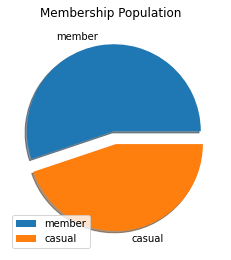

In [163]:
mem_type = merged.membership_type.value_counts().rename_axis('type').reset_index(name='counts')
plt.pie(mem_type['counts'], labels = mem_type['type'], explode =[0.15,0],shadow = True)
plt.suptitle("Membership Population")
plt.legend(loc=3)

Having alomst equal population< lets dive deepber to find categorical

Make a barplot of weekday by membership_type

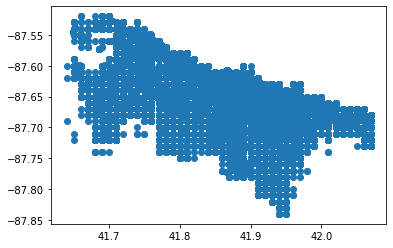

In [124]:
plt.scatter(merged['start_lat'], merged['start_lng'])

Make a barplot of dur_desc by membership_type

In [233]:
nw_merged = merged[['ride_id','rideable_type','membership_type']]
nw_merged['num']=1

new=pd.pivot_table(nw_merged, values= 'num', index='rideable_type', columns='membership_type',
                          aggfunc='count')
new

C:\Users\Owner\AppData\Local\Temp/ipykernel_20160/1251172640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_merged['num']=1


membership_type,casual,member
rideable_type,,
classic_bike,1266454.0,1997163.0
docked_bike,311098.0,NaN
electric_bike,960665.0,1124651.0


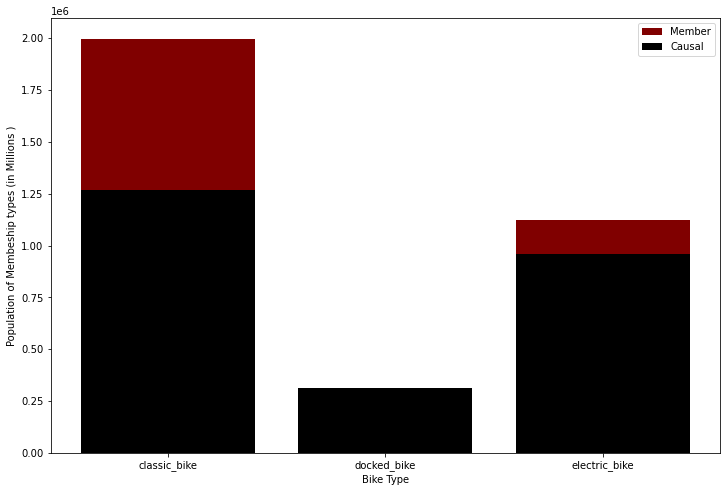

In [234]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

plt.bar(new.index, new["member"],color="maroon",label ='Member')
plt.bar(new.index, new["casual"],color="black",label ='Causal')
plt.xlabel('Bike Type')
plt.ylabel('Population of Membeship types (in Millions )')
plt.legend()

INFERENCES
*Docked Bikes are only prefered my those with casual memberships

*the electric bike type possses alomts equal distribution of membeship types 

*classic bike differ in each membeship groups by about 10 percent